## Autoencoder
__________________________________

Autoencoders are a type of neural network that learns efficient representations of data. We will use the `Network` class to train an neural network to replicate a handwritten digit. We first import the MNIST handwritten digit dataset and uncompress it. 

In [1]:
import pickle, gzip
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
np.random.seed(0)

In [2]:
with gzip.open('../resources/data/mnist.pkl.gz', 'rb') as f:
    train, test, val = pickle.load(f, encoding='latin1')
    mnist = train[0]

In [3]:
from vae import Network

After we import the `Network` class, we set up the parameters and intialize the weights. The loss function is the squared error and the activation function is the sigmoid. As part of backpropogation, we also need to pass in the derviative of the loss and activation. 

$$Loss(y, \hat{y}) = \sum (y - \hat{y})^2 \qquad \sigma(x) = \frac{1}{1 + exp(-x)}$$

In [11]:
params = {
    'alpha' : 0.1,
    'iter' : 2,
    'activation' : 'sigmoid',
    'loss' : 'squared_error',
    'batch_size': 0
}

example = Network([784, 200, 784], params)

### Training on Digits

Here we pass a training digit, a zero, of size 28 by 28 pixels.

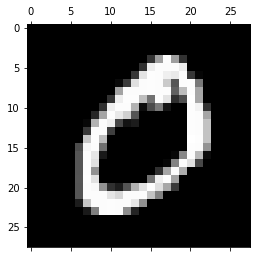

In [12]:
in_digit = np.array((mnist[1][None,:]))
plt.matshow(in_digit.reshape((28,28)), cmap='gray', clim=(0,1))
pass

We intialize the weights to be random, so the first pass looks jumbled.

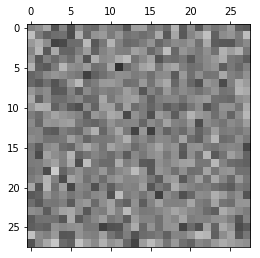

In [13]:
out_digit = example.predict(in_digit)
plt.matshow(out_digit.reshape((28,28)), cmap = 'gray', clim=(0,1))
pass

We then train the network to reduce the loss function and reproduce the training image. Here are the reconstructed images after just the first 10 training interations. It very rapidly reassembles the digit without error.

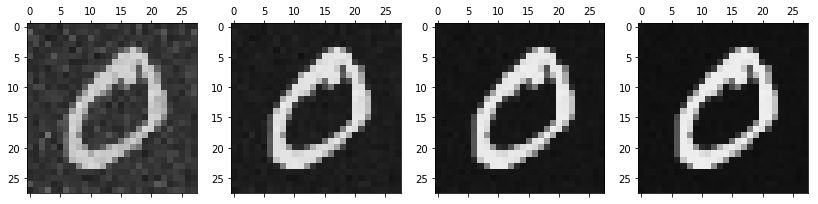

In [14]:
fig, ax = plt.subplots(1, 4, figsize = (14, 10))

for i in range(4):
    example.train(in_digit, in_digit)
    pred1 = example.predict(in_digit)
    ax[i].matshow(pred1.reshape((28,28)), cmap='gray', clim=(0,1))
pass

### References

1. [MNIST data](http://deeplearning.net/tutorial/gettingstarted.html)